<a href="https://colab.research.google.com/github/namanh29/MachineLearning/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


"\nmsk = np.random.rand(len(df)) <= 0.7   # msk = true neu so ngau nhien sinh ra <= 0.7\nprint(msk)\ntrain = df[msk]\ntest = df[~msk]\nprint(train.shape)\nprint(len(train['sentiment']))\nprint(test)\n"

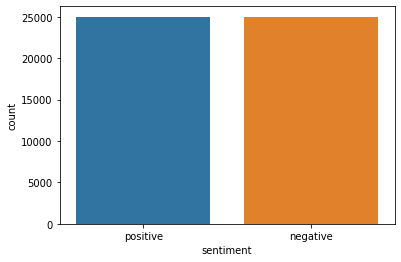

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D
from keras.layers import LSTM
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')
#df['split'] = np.random.randn(df.shape[0],1)   # them cot split co gia tri theo pp chuan, df.shape[0] = 50000
print (df)
sns.countplot(x='sentiment', data=df)

'''
msk = np.random.rand(len(df)) <= 0.7   # msk = true neu so ngau nhien sinh ra <= 0.7
print(msk)
train = df[msk]
test = df[~msk]
print(train.shape)
print(len(train['sentiment']))
print(test)
'''



In [ ]:
#Preprocessing
def preprocess_text(sen):
  # Xoa the html
  sentence = remove_tags(sen)

  # Xoa dau cau va so
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)
 
  # Xoa ki tu don
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

  # Xoa nhieu space
  sentence = re.sub(r'\s+', ' ', sentence)

  return sentence

tag_re = re.compile(r'<[^>]+>')
def remove_tags(text):
  return tag_re.sub('', text) 

x = []  # x[i] chua 1 cmt da duoc tien xu ly
sentences = list(df['review'])
for sen in sentences:
  x.append(preprocess_text(sen))
#print (x[3])

# Chuyen doi label: positive->1, negative->0
y = df['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))   # y[i] chua label duoc chuyen dang so 0,1

# Chia dataset thanh training set and testing set
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x_train[1])
print(y_train)

This was very good PPV but like Wrestlemania XX some years later the WWE crammed so many matches on it some of the matches were useless m not going to go through every match on the card because it would take forever to do However major highlights included the HUGE pop for Demolition winning the tag team belts from Haku and Andre the Giant The first ever mixed tag match featuring Randy Savage and Sensational Queen Sherri vs Dusty Rhodes and the late Sapphire and the first ever clash between The Ultimate Warrior and Hulk Hogan Some matches were complete waste of time Like The Bolsheviks vs The Hart Foundation was only about seconds long Koko Ware vs Rick Martel was short and Big Bossman vs Akeem was too short Mr Perfect vs Brutus Beefcake and Ted DiBiase vs Jake the snake Roberts were very good indeed Overall Grade B
[0 1 0 ... 0 1 1]


In [ ]:
# Prepareing embedding layer
# Su dung Tokennizer de tao tu dien word-to-index (moi tu duoc bieu dien la 1 so)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)   # cap nhat tu dien dua tren tap x_train

x_train = tokenizer.texts_to_sequences(x_train)   # chuyen text thanh chuoi so nguyen
x_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1
maxlen =100  # Kich thuoc moi danh sach

# Chuyen danh sach cac chuoi so nguyen thanh mang 2 chieu (so vd, maxlen)
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

print(x_train)
print(x_train.shape[1])
print(vocab_size)

# Su dung Glove embedding de tao ra ma tran thuoc tinh
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt', encoding='utf8')
for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:], dtype='float32')
  embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

print(embedding_matrix)
print(embedding_matrix.shape)

[[  11   68   11 ...    0    0    0]
 [   4  138  139 ...  442 1198 2003]
 [ 115    1  173 ...  628 1054    3]
 ...
 [ 779    8   24 ...    0    0    0]
 [   8  353   10 ...    0    0    0]
 [ 273  100  121 ...   66   68 1956]]
100
87525
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 [-0.071953    0.23127     0.023731   ... -0.71894997  0.86894
   0.19539   ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.37771001  0.22946    -0.30311    ... -0.33610001  0.02637
  -0.72302002]
 [ 0.99882001  0.044       0.58508003 ... -0.54869002  0.15141
   1.36880004]]
(87525, 100)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          8752500   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 8,762,501
Trainable params: 10,001
Non-trainable params: 8,752,500
_________________________________________________________________
None
Epoch 1/6
219/219 [==============================] - 4s 6ms/step - loss: 0.6722 - acc: 0.6135 - val_loss: 0.5456 - val_acc: 0.7250
Epoch 2/6
219/219 [==============================] - 1s 4ms/step - loss: 0.4954 - acc: 0.7634 - val_loss: 0.5291 - val_acc: 0.7366
Epoch 3/6
219/219 [==============================] - 1s 4ms/step - loss: 0.4550 - acc: 0.7895 - val_loss

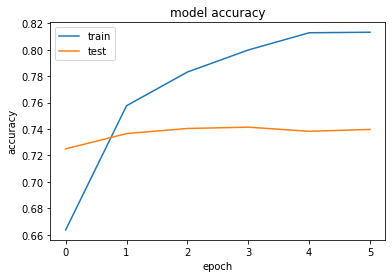

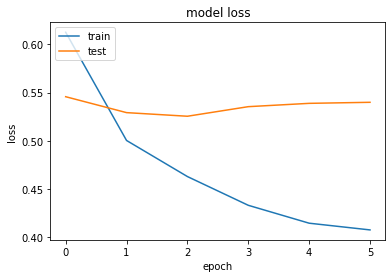

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

# train model
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

# Ve bieu do so sanh
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          8752500   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 96, 256)           128256    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 8,881,013
Trainable params: 128,513
Non-trainable params: 8,752,500
_________________________________________________________________
None
Epoch 1/9
219/219 [==============================] - 2s 8ms/step - loss: 0.5959 - acc: 0.6756 - val_loss: 0.4049 - val_acc: 0.8161
Epoch 2/9
219/219 [==============================] - 2s 7ms/step - loss: 0.3679 - acc: 0.8361 - val_

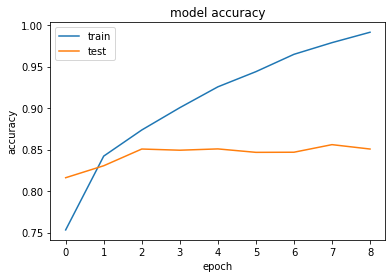

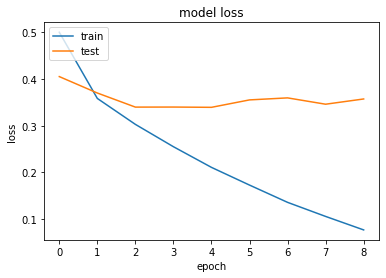

In [ ]:
#CNN
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
model.add(embedding_layer)

model.add(Conv1D(256,5,activation='relu'))
#model.add(Conv1D(128,5,activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

history = model.fit(x_train, y_train, batch_size=128, epochs=9, verbose=1, validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          8752500   
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 8,869,877
Trainable params: 117,377
Non-trainable params: 8,752,500
_________________________________________________________________
None
Epoch 1/9
219/219 [==============================] - 8s 30ms/step - loss: 0.6399 - acc: 0.4971 - val_loss: 0.4807 - val_acc: 0.5001
Epoch 2/9
219/219 [==============================] - 6s 27ms/step - loss: 0.4799 - acc: 0.4946 - val_loss: 0.4477 - val_acc: 0.5001
Epoch 3/9
219/219 [==============================] - 6s 28ms/step - loss: 0.4299 - acc: 0.4963 - va

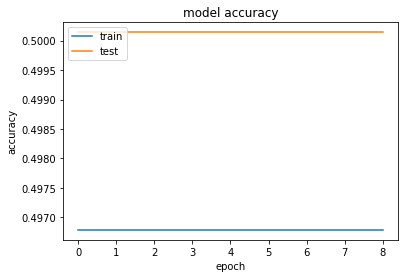

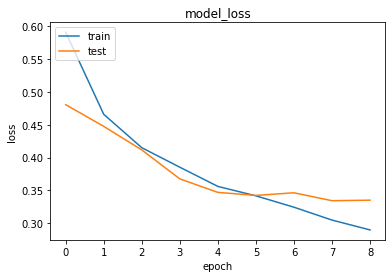

In [ ]:
# RNN (LSTM)
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

history = model.fit(x_train, y_train, batch_size=128, epochs=9, verbose=1, validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()